In [99]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [100]:
model = tf.keras.models.load_model('/home/legramante/Documentos/catandogs/models/cat_dog_classifier.h5')

In [192]:
img_path = '/home/legramante/Documentos/catandogs/cats_and_dogs/train/cats/class1_8.jpg'

img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [193]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [194]:
confidence = prediction[0][0]

if confidence >= 0.5:
    print(f"Cachorro 🐶 ({confidence:.2f})")
else:
    print(f"Gato 🐱 ({1 - confidence:.2f})")

Gato 🐱 (0.83)


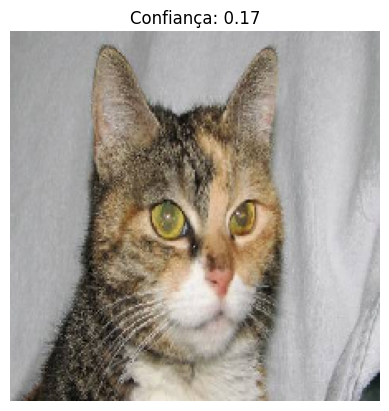

In [195]:
plt.imshow(img)
plt.axis('off')
plt.title(f"Confiança: {confidence:.2f}")
plt.show()

In [22]:
import tensorflow as tf

test_dir = "/home/legramante/Documentos/catandogs/custom_test"

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)


Found 4 images belonging to 2 classes.


In [23]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.4936
Test Loss: 0.4936
Test Accuracy: 1.0000


In [20]:
test_dir = "/home/legramante/Documentos/catandogs/custom_test/dogs"